#  LinearSVR (Linear Support Vector Regression)

We are predicting the fuel consumption using LinearSVR based on the location and density

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

Load the csv file containing the fuel and density data at each and every cluster

In [2]:
data = pd.read_csv('fuel_at_centroid_with_density_30.csv',delimiter=',')

In [3]:
data

,X-axis,Y-axis,Timestep,Density,Fuel
0,11333.113335,9686.781000,0,0,0.0
1,11333.113335,9686.781000,1,0,0.0
2,11333.113335,9686.781000,2,0,0.0
3,11333.113335,9686.781000,3,0,0.0
4,11333.113335,9686.781000,4,0,0.0
...,...,...,...,...,...
786715,9061.086375,12163.665061,26219,0,0.0
786716,9061.086375,12163.665061,26220,0,0.0
786717,9061.086375,12163.665061,26221,0,0.0
786718,9061.086375,12163.665061,26222,0,0.0


In [4]:
data

,X-axis,Y-axis,Timestep,Density,Fuel
0,11333.113335,9686.781000,0,0,0.0
1,11333.113335,9686.781000,1,0,0.0
2,11333.113335,9686.781000,2,0,0.0
3,11333.113335,9686.781000,3,0,0.0
4,11333.113335,9686.781000,4,0,0.0
...,...,...,...,...,...
786715,9061.086375,12163.665061,26219,0,0.0
786716,9061.086375,12163.665061,26220,0,0.0
786717,9061.086375,12163.665061,26221,0,0.0
786718,9061.086375,12163.665061,26222,0,0.0


In [5]:
data.describe()

,X-axis,Y-axis,Timestep,Density,Fuel
count,786720.000000,786720.000000,786720.000000,786720.000000,786720.000000
mean,10166.334715,10081.902081,13111.500000,19.070605,38.622881
std,1887.635111,2711.414457,7570.221535,10.970396,26.414466
min,7756.116437,6092.923539,0.000000,0.000000,0.000000
25%,8463.869914,8168.036799,6555.750000,10.000000,15.020000
50%,10319.334104,9706.541200,13111.500000,19.000000,37.660000
75%,11374.831890,11770.056190,19667.250000,26.000000,56.900000
max,13940.659439,15791.264342,26223.000000,66.000000,180.910000


Create dummies of the location which represents the individual cluster

In [6]:
dataset = pd.get_dummies(data['X-axis'])

In [7]:
dataset['Density'] = data['Density']
dataset['Fuel'] = data['Fuel']

In [9]:
dataset

,7756.116436981559,7870.708098885609,7971.56453810754,8141.1754952336705,8258.15408752111,8343.624494967391,8387.810710618922,8463.86991403405,8645.14636890259,8672.623784186992,...,11374.831889679099,11575.0234739541,11706.4107481944,11980.3465415253,13450.677328151201,13532.6156239151,13715.5317043897,13940.659438899,Density,Fuel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
786716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
786717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
786718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [16]:
col = []
for i in range(1,33):
    col.append(i)

col
dataset.columns = col

In [17]:
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
786716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
786717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
786718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


Scaling the density and fuel consumption values

In [46]:
standard_scaler = preprocessing.StandardScaler()
scaled_df = standard_scaler.fit_transform(dataset[[31,32]])
scaled_df = pd.DataFrame(scaled_df)
dataset[[31,32]]=scaled_df
dataset

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188
786716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188
786717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188
786718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.738371,-1.462188


Creating input and output features from the dataset

In [50]:
X = dataset.drop([32],axis=1)
y = dataset[32]


Creating LinearSVR model

In [51]:
from sklearn.svm import LinearSVR

In [52]:
regr = LinearSVR()

In [53]:
regr.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [54]:
y_pred = regr.predict(X)

Ploting the actual and predicted values of the fuel 

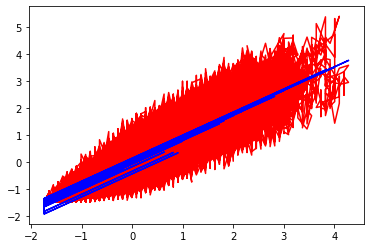

In [55]:
plt.plot(X[31],y,'r')
plt.plot(X[31],y_pred,'b',)